# Titanic

## Part II: Feature Engineering

This is a continuation of the [previous notebook](./titanic-part1.ipynb) which dealt with exploratory analysis of Titanic dataset.

In this notebook, we'll create a new dataset containing both training and test data, fill missing values, create new columns, and prepare datasets for machine learning.

Table of contents:

* [Data preparation](#Data-preparation)
* [Filling missing values](#Filling-missing-values)
* [Creating new columns](#Creating-new-columns)
* [Final touches](#Final-touches)

## Data preparation

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11

In [3]:
df_train = pd.read_csv('./datasets/titanic-train.csv', index_col='PassengerId')
df_test = pd.read_csv('./datasets/titanic-test.csv', index_col='PassengerId')

In [4]:
df_train['source'] = 'train'
df_test['source'] = 'test'

df = pd.concat([df_train, df_test], axis=0)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,source
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,train
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,train
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,train
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,train
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,train


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
source      1309 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 132.9+ KB


In [6]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [7]:
df.select_dtypes(include=['object']).describe()

,Cabin,Embarked,Name,Sex,Ticket,source
count,295,1307,1309,1309,1309,1309
unique,186,3,1307,2,929,2
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343,train
freq,6,914,2,843,11,891


## Filling missing values

### Embarked

Most of the passengers embarked in Southampton, and logical thing to do would be to fill missing embarkment values with it. Let's see if we can do better.

In [8]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,source
PassengerId,,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572,train
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572,train


Both passengers with missing port of embarkment paid the same fare (80) and were in first class (Pclass = 1). Let's explore if that's in line with some embarkment's values.

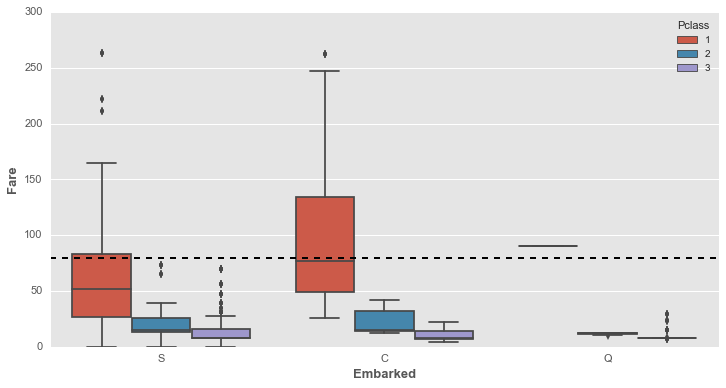

In [9]:
ax = sns.boxplot(data=df, x='Embarked', y='Fare', hue='Pclass')

_ = (ax.set_ylim(0, 300),
     ax.axhline(80, lw=2, c='black', ls='--')
    )

Cherbourg seems like a much more likely choice than our first instinct, Southampton.

In [10]:
df.Embarked.fillna('C', inplace=True)

### Fare

In [11]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,source
PassengerId,,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701,test


In [12]:
med = df[(df.Embarked == 'S') & (df.Pclass == 3)]['Fare'].median()
med

8.05

We'll fill the missing value with the median value (8.05) for people who embarked in Southampton and were in third class.

In [13]:
df.Fare.fillna(med, inplace=True)

## Creating new columns

### Male

Scikit-learn cannot deal with strings, so the easiest way to convert `Sex` column is to introduce `male` column, which will have two values: 

* 1 for males
* 0 for females

In [14]:
df['male'] = (~df['Sex'].str.contains('fe')).astype(int)

### Last name

It is possible to extract last names of passengers, which might be useful later when we'll deal with families.

In [15]:
def extract_last_name(full_name):
    return full_name.split(',')[0]

df['last_name'] = df.Name.apply(extract_last_name)

### Title

Let's extract titles from passengers' full names. Different titles might have different survival rates, and this could be useful for grouping people.

In [16]:
def extract_title(full_name):
    return full_name.split(',')[1].split('.')[0].strip()

all_titles = np.unique(df.Name.map(extract_title))
all_titles

array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype=object)

18 different titles, and some of them mean the same thing. Let's simplify it a bit:

In [17]:
titles = {
    "Capt":        "Officer", 
    "Col":         "Officer",
    "Major":       "Officer", 
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Mr", 
    "Don":         "Mr", 
    "Sir" :        "Mr", 
    "Mr" :         "Mr",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "the Countess":"Miss",
    "Dona":        "Miss", 
    "Lady" :       "Mrs",     
    "Mme":         "Mrs",
    "Mrs" :        "Mrs",
    "Ms":          "Mrs",
    "Master" :     "Master",
} 

df['title'] = df.Name.map(lambda x: titles[extract_title(x)])

In [18]:
df.pivot_table(values=['Pclass'], index=['title'], columns=['Sex'], 
               margins=True, aggfunc='count')

Pclass               
Sex     female   male     All
title                        
Master     NaN   61.0    61.0
Miss     264.0    NaN   264.0
Mr         NaN  760.0   760.0
Mrs      201.0    NaN   201.0
Officer    1.0   22.0    23.0
All      466.0  843.0  1309.0

We'll move the only female officer to `Miss` so each title class will contain only one sex.

In [19]:
df.loc[(df.title == 'Officer') & (df.Sex == 'female'), 'title'] = 'Miss'

Some kids have title 'Mr', but based on their age they should have a 'Master' title. Let's change that.

In [20]:
# the oldest master
df.loc[(df.title == 'Master'), 'Age'].max()

14.5

In [21]:
df.loc[(df.title == 'Mr') & (df.Age <= 14.5), 'title'] = 'Master'

In [22]:
df.pivot_table(values=['Pclass'], index=['title'], columns=['Sex'], margins=True, aggfunc='count')

Pclass               
Sex     female   male     All
title                        
Master     NaN   66.0    66.0
Miss     265.0    NaN   265.0
Mr         NaN  755.0   755.0
Mrs      201.0    NaN   201.0
Officer    NaN   22.0    22.0
All      466.0  843.0  1309.0

### Age

There are lots of missing values, so we'll calculate a mean and standard deviation for each group of passengers. A group of passengers are people with the same sex, travelling class, and title.  
People with missing age values will get a value that is within one standard deviation from the mean of their group defined above.

In [23]:
ages_mean = df.pivot_table('Age', index=['title'], columns=['Sex', 'Pclass'], aggfunc='mean')
ages_mean

Sex         female                             male                      
Pclass           1          2          3          1          2          3
title                                                                    
Master         NaN        NaN        NaN   6.984000   3.694167   6.788537
Miss     30.609375  20.717083  17.360874        NaN        NaN        NaN
Mr             NaN        NaN        NaN  41.470370  32.481618  28.514610
Mrs      43.000000  33.418182  32.326531        NaN        NaN        NaN
Officer        NaN        NaN        NaN  51.090909  40.700000        NaN

In [24]:
ages_std = df.pivot_table('Age', index=['title'], columns=['Sex', 'Pclass'], aggfunc='std')
ages_std

Sex         female                             male                     
Pclass           1          2          3          1          2         3
title                                                                   
Master         NaN        NaN        NaN   4.974061   4.156750  4.507170
Miss     11.549228  12.207963   9.935434        NaN        NaN       NaN
Mr             NaN        NaN        NaN  13.357004  11.799938  9.819658
Mrs      14.031477  10.422005  10.194745        NaN        NaN       NaN
Officer        NaN        NaN        NaN   9.689732  12.927576       NaN

In [25]:
def age_guesser(person):
    gender = person['Sex']
    mean_age = ages_mean[gender].loc[person['title'], person['Pclass']]
    std = ages_std[gender].loc[person['title'], person['Pclass']]
    persons_age = np.random.randint(mean_age - std, mean_age + std)
    return persons_age

unknown_age = df['Age'].isnull()
df['new_age'] = df.Age.copy()

df.loc[unknown_age, 'new_age'] = df.apply(age_guesser, axis=1)

Let's compare age densities before and after filling the values.

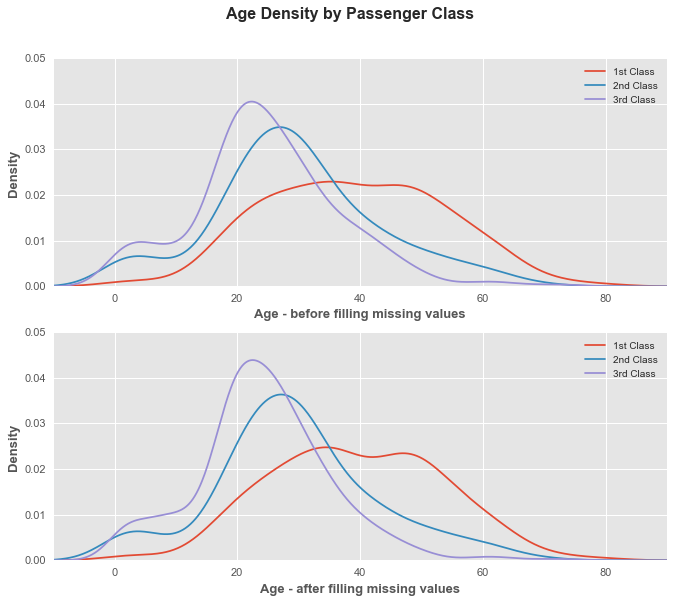

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,9))

for pclass in [1, 2, 3]:
    df[df['Pclass'] == pclass]['Age'].plot.kde(ax=ax1)
    df[df['Pclass'] == pclass]['new_age'].plot.kde(ax=ax2)

    
fig.suptitle('Age Density by Passenger Class', size=16, weight='bold')

_ = (ax1.set_xlabel('Age - before filling missing values'),
     ax2.set_xlabel('Age - after filling missing values')
    )
     
for ax in [ax1, ax2]:
    ax.set_xlim(-10, 90)
    ax.set_ylim(0, 0.05)
    ax.legend(('1st Class', '2nd Class', '3rd Class'))

### Family

New column `family` will have the total number of close family members on board (`Parch` and `SibSp`).

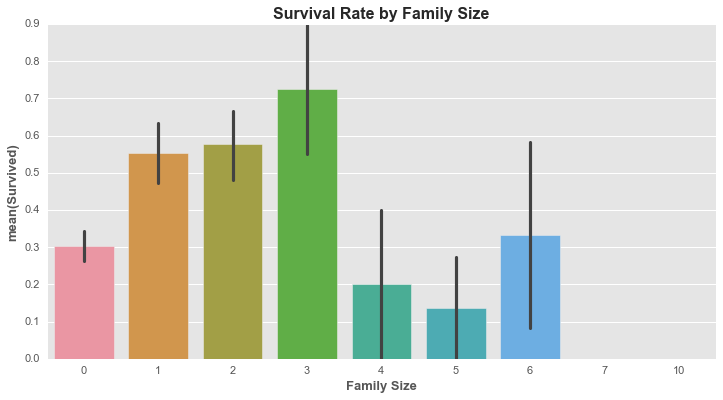

In [27]:
df['family'] = df.Parch + df.SibSp

ax = sns.barplot(x='family', y='Survived', data=df)
_ = (ax.set_title('Survival Rate by Family Size'),
     ax.set_xlabel('Family Size')
)

In column `known_people`, we'll divide passengers in four groups:
- 0 - no family or friend
- 1 - no family, but has friends on board (people on the same ticket)
- 2 - small family (1-3 members)
- 3 - large family (4+ members)

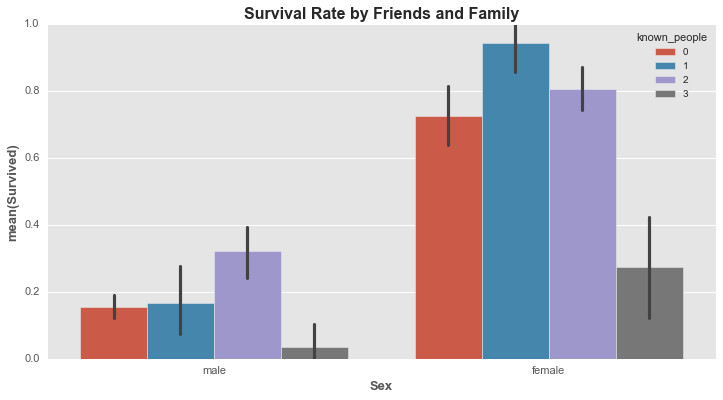

In [28]:
def family_size(family):
    if family > 3:
        return 3
    elif family >= 1:
        return 2
    else:
        return 0
    
def find_companions(ticket):
    return int(df.loc[df.Ticket == ticket].shape[0] > 1)

df['known_people'] = df.family.map(family_size)
df.loc[df.family == 0, 'known_people'] = df.loc[df.family == 0, 'Ticket'].map(find_companions)    


ax = sns.barplot(x='Sex', y='Survived', hue='known_people', data=df)
_ = (ax.set_title('Survival Rate by Friends and Family'),
     ax.set_xlabel('Sex')
)

Survival rates of males without family is almost the same regardless of having friends on board or not. Males with small families have the highest chances for survival.  
Females without family but with some friend had the highest chances for survival, followed by females with small families and females without any companion.  
Survival rates for both sexes are very low if they had large family.

### Mothers

Married women (`Mrs`) who had children (`Parch > 0`) with them on the ship.

In [29]:
df['mother'] = ((df.title == 'Mrs') & (df.Parch > 0)).astype(int)

### Some family survived

We'll create a new column `family_survived` which will have three values:

* 1 - some family member or friend survived
* 0 - no family members or friends survived
* -1 - doesn't have family members or friends on the ship

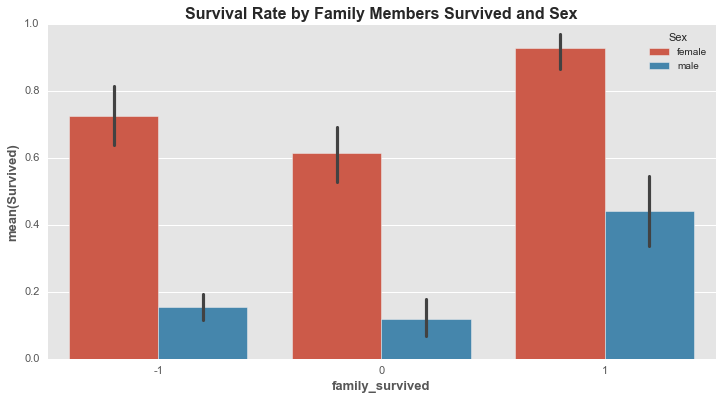

In [30]:
family_survived = df.Survived.groupby([df.last_name, df.family]).sum()
friend_survived = df.Survived.groupby(df.Ticket).sum()

def some_family_survived(person):
    if person.family > 0:
        if person.source == 'train':
            return ((family_survived[person.last_name, person.family] - person.Survived) > 0).astype(int)
        else:
            return (family_survived[person.last_name, person.family] > 0).astype(int)
    else:
        if person.source == 'train':
            return ((friend_survived[person.Ticket] - person.Survived) > 0).astype(int)
        else:
            return (friend_survived[person.Ticket] > 0).astype(int)

df['family_survived'] = -1
df.loc[df.known_people > 0, 'family_survived'] = df[df.known_people > 0].apply(some_family_survived, axis=1)


ax = sns.barplot(data=df, x='family_survived', y='Survived', 
                 hue='Sex', hue_order=['female', 'male'])
_ = (ax.set_title('Survival Rate by Family Members Survived and Sex'))

Both sexes had highest chances for survival if some member of their family or friend had survived. People whose close friends had died had lowest chances for survival.

### Fare

If more than one person is on the same ticket, their fare is calculated as sum of  their individual ticket prices. A better indicator would be `fare_per_person`.

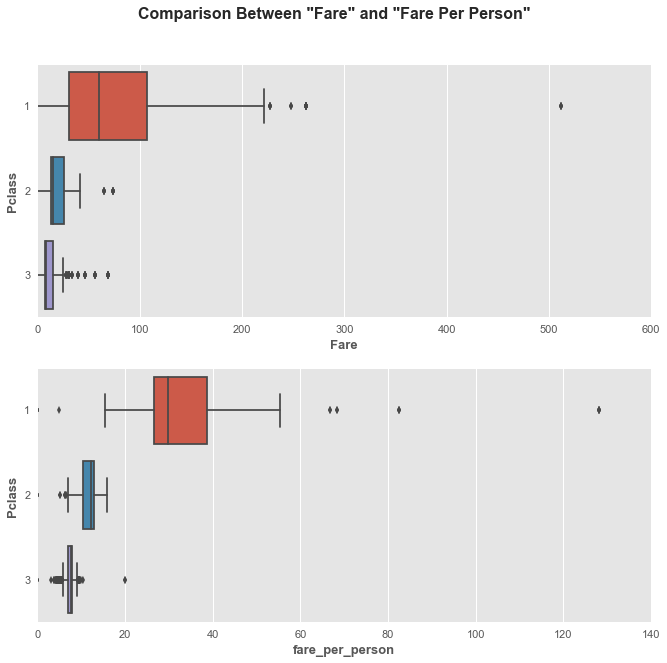

In [31]:
def fare_per_person(person):
    nr_on_same_ticket = df.loc[df.Ticket == person.Ticket, 'Ticket'].value_counts()[0]
    return person.Fare / nr_on_same_ticket

df['fare_per_person'] = df.apply(fare_per_person, axis=1)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,10))

sns.boxplot(x=df.Fare, y=df.Pclass, orient='h', ax=ax1)
sns.boxplot(x=df.fare_per_person, y=df.Pclass, orient='h', ax=ax2)
fig.suptitle('Comparison Between "Fare" and "Fare Per Person"')

`fare per person` already looks like a better indicator than `Fare`, but it has lots of outliers - let's try to clean it.

#### Cleaning outliers

##### Third class

In [32]:
columns = ['Name', 'Embarked', 'new_age', 'Fare', 'Ticket', 'fare_per_person']

In [33]:
df.loc[df.Pclass == 3, 'fare_per_person'].describe()

count    709.000000
mean       7.330162
std        1.470572
min        0.000000
25%        7.061975
50%        7.750000
75%        7.925000
max       19.966700
Name: fare_per_person, dtype: float64

In [34]:
df.loc[(df.Pclass == 3) & (df.fare_per_person == 0), columns]

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
180,"Leonard, Mr. Lionel",S,36.0,0.0,LINE,0.0
272,"Tornquist, Mr. William Henry",S,25.0,0.0,LINE,0.0
303,"Johnson, Mr. William Cahoone Jr",S,19.0,0.0,LINE,0.0
598,"Johnson, Mr. Alfred",S,49.0,0.0,LINE,0.0


In [35]:
df.loc[(df.Pclass == 3) & (df.fare_per_person == 0), 'fare_per_person'] = np.nan

# replace zero values with median for their class and port of embarkment
med = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'fare_per_person'].median()
df.loc[(df.Pclass == 3) & (df.fare_per_person.isnull()), 'fare_per_person'] = med

In [36]:
df.loc[(df.Pclass == 3) & (df.fare_per_person > 12), columns]

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
452,"Hagland, Mr. Ingvald Olai Olsen",S,26.0,19.9667,65303,19.9667
491,"Hagland, Mr. Konrad Mathias Reiersen",S,19.0,19.9667,65304,19.9667


In [37]:
# their ticket number differs in just last number, treat it as a same ticket
df.loc[(df.Pclass == 3) & (df.fare_per_person > 12), 'fare_per_person'] = df.fare_per_person / 2

In [38]:
df.loc[(df.Pclass == 3) & (df.fare_per_person > 9.5) & (df.fare_per_person == df.Fare), columns].sort_values(by='Ticket')

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
688,"Dakic, Mr. Branko",S,19.0,10.1708,349228,10.1708
484,"Turkula, Mrs. (Hedwig)",S,63.0,9.5875,4134,9.5875
504,"Laitinen, Miss. Kristina Sofia",S,37.0,9.5875,4135,9.5875
114,"Jussila, Miss. Katriina",S,20.0,9.8250,4136,9.8250
403,"Jussila, Miss. Mari Aina",S,21.0,9.8250,4137,9.8250
678,"Turja, Miss. Anna Sofia",S,18.0,9.8417,4138,9.8417
883,"Dahlberg, Miss. Gerda Ulrika",S,22.0,10.5167,7552,10.5167
475,"Strandberg, Miss. Ida Sofia",S,22.0,9.8375,7553,9.8375


In [39]:
# sisters?
df.loc[(df.Pclass == 3) & (df.fare_per_person > 9.5) & (df.last_name == 'Jussila'), 'fare_per_person'] = df.fare_per_person / 2

In [40]:
df.loc[(df.Pclass == 3) & (df.fare_per_person < 4), columns].sort_values(by='Ticket')

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",S,27.0,11.1333,347742,3.7111
173,"Johnson, Miss. Eleanor Ileen",S,1.0,11.1333,347742,3.7111
870,"Johnson, Master. Harold Theodor",S,4.0,11.1333,347742,3.7111
913,"Olsen, Master. Artur Karl",S,9.0,3.1708,C 17368,3.1708


No other obvious outliers in third class, based on the ticket and last name.

##### Second class

In [41]:
df.loc[df.Pclass == 2, 'fare_per_person'].describe()

count    277.00000
mean      11.41101
std        2.63293
min        0.00000
25%       10.50000
50%       12.35000
75%       13.00000
max       16.00000
Name: fare_per_person, dtype: float64

In [42]:
df.loc[(df.Pclass == 2) & (df.fare_per_person == 0), columns]

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
278,"Parkes, Mr. Francis ""Frank""",S,42.0,0.0,239853,0.0
414,"Cunningham, Mr. Alfred Fleming",S,32.0,0.0,239853,0.0
467,"Campbell, Mr. William",S,29.0,0.0,239853,0.0
482,"Frost, Mr. Anthony Wood ""Archie""",S,23.0,0.0,239854,0.0
675,"Watson, Mr. Ennis Hastings",S,20.0,0.0,239856,0.0
733,"Knight, Mr. Robert J",S,31.0,0.0,239855,0.0


In [43]:
df.loc[(df.Pclass == 2) & (df.fare_per_person == 0), 'fare_per_person'] = np.nan

# replace zero values with median for their class and port of embarkment
med = df.loc[(df.Pclass == 2) & (df.Embarked == 'S'), 'fare_per_person'].median()
df.loc[(df.Pclass == 2) & (df.fare_per_person.isnull()), 'fare_per_person'] = med

In [44]:
df.loc[(df.Pclass == 2) & (df.fare_per_person > 13) & (df.fare_per_person == df.Fare), columns].sort_values(by='Ticket')

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
563,"Norman, Mr. Robert Douglas",S,28.0,13.5000,218629,13.5000
1054,"Wright, Miss. Marion",S,26.0,13.5000,220844,13.5000
707,"Kelly, Mrs. Florence ""Fannie""",S,45.0,13.5000,223596,13.5000
953,"McCrae, Mr. Arthur Gordon",S,32.0,13.5000,237216,13.5000
233,"Sjostedt, Mr. Ernst Adolf",S,59.0,13.5000,237442,13.5000
587,"Jarvis, Mr. John Denzil",S,47.0,15.0000,237565,15.0000
1002,"Stanton, Mr. Samuel Ward",C,41.0,15.0458,237734,15.0458
1193,"Malachard, Mr. Noel",C,29.0,15.0458,237735,15.0458
1077,"Maybery, Mr. Frank Hubert",S,40.0,16.0000,239059,16.0000


In [45]:
df.loc[(df.Pclass == 2) & (df.last_name == 'Duran y More'), 'fare_per_person'] = df.fare_per_person / 2

In [46]:
df.loc[(df.Pclass == 2) & (df.fare_per_person < 10.5) & (df.fare_per_person == df.Fare), columns].sort_values(by='Ticket')

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
894,"Myles, Mr. Thomas Francis",Q,62.0,9.6875,240276,9.6875


No other obvious outliers in third class, based on the ticket and last name.

##### First class

In [47]:
df.loc[df.Pclass == 1, 'fare_per_person'].describe()

count    323.000000
mean      33.910500
std       15.369762
min        0.000000
25%       26.550000
50%       29.700000
75%       38.643750
max      128.082300
Name: fare_per_person, dtype: float64

In [48]:
df.loc[(df.Pclass == 1) & (df.fare_per_person == 0), columns]

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
264,"Harrison, Mr. William",S,40.0,0.0,112059,0.0
634,"Parr, Mr. William Henry Marsh",S,29.0,0.0,112052,0.0
807,"Andrews, Mr. Thomas Jr",S,39.0,0.0,112050,0.0
816,"Fry, Mr. Richard",S,40.0,0.0,112058,0.0
823,"Reuchlin, Jonkheer. John George",S,38.0,0.0,19972,0.0
1158,"Chisholm, Mr. Roderick Robert Crispin",S,52.0,0.0,112051,0.0
1264,"Ismay, Mr. Joseph Bruce",S,49.0,0.0,112058,0.0


In [49]:
df.loc[(df.Pclass == 1) & (df.fare_per_person == 0), 'fare_per_person'] = np.nan

# replace zero values with median for their class and port of embarkment
med = df.loc[(df.Pclass == 1) & (df.Embarked == 'S'), 'fare_per_person'].median()
df.loc[(df.Pclass == 1) & (df.fare_per_person.isnull()), 'fare_per_person'] = med

df.loc[df.Pclass == 1, 'fare_per_person'].describe()

count    323.000000
mean      34.485887
std       14.562862
min        5.000000
25%       26.550000
50%       29.700000
75%       38.643750
max      128.082300
Name: fare_per_person, dtype: float64

In [50]:
df.loc[(df.Pclass == 1) & (df.fare_per_person < 20), columns].sort_values(by='Ticket')

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
271,"Cairns, Mr. Alexander",S,47.0,31.0,113798,15.5
843,"Serepeca, Miss. Augusta",C,30.0,31.0,113798,15.5
873,"Carlsson, Mr. Frans Olof",S,33.0,5.0,695,5.0
854,"Lines, Miss. Mary Conover",S,16.0,39.4,PC 17592,19.7
1283,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",S,51.0,39.4,PC 17592,19.7


Mr. Carlsson has unusually low fare price, so we'll change that to the median of all passengers from Southampton in the first class. (Reusing `med` from above)

In [51]:
df.loc[873, 'fare_per_person'] = med

In [52]:
df.loc[(df.Pclass == 1) & (df.fare_per_person > 40) & (df.fare_per_person == df.Fare), columns].sort_values(by='Ticket')

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
1107,"Head, Mr. Christopher",S,42.0,42.5000,113038,42.5000
186,"Rood, Mr. Hugh Roscoe",S,34.0,50.0000,113767,50.0000
1190,"Loring, Mr. Joseph Holland",S,30.0,45.5000,113801,45.5000
584,"Ross, Mr. John Hugo",C,36.0,40.1250,13049,40.1250
540,"Frolicher, Miss. Hedwig Margaritha",C,22.0,49.5000,13568,49.5000
1270,"Hipkins, Mr. William Edward",S,55.0,50.0000,680,50.0000
711,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",C,24.0,49.5042,PC 17482,49.5042
868,"Roebling, Mr. Washington Augustus II",S,31.0,50.4958,PC 17590,50.4958
1058,"Brandeis, Mr. Emil",C,48.0,50.4958,PC 17591,50.4958


In [53]:
df.loc[(df.Pclass == 1) & (df.fare_per_person > 60), columns].sort_values(by='Ticket')

,Name,Embarked,new_age,Fare,Ticket,fare_per_person
PassengerId,,,,,,
1144,"Clark, Mr. Walter Miller",C,27.0,136.7792,13508,68.389600
1164,"Clark, Mrs. Walter Miller (Virginia McDowell)",C,26.0,136.7792,13508,68.389600
119,"Baxter, Mr. Quigg Edmond",C,24.0,247.5208,PC 17558,82.506933
300,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",C,50.0,247.5208,PC 17558,82.506933
1076,"Douglas, Mrs. Frederick Charles (Mary Helene B...",C,27.0,247.5208,PC 17558,82.506933
335,"Frauenthal, Mrs. Henry William (Clara Heinshei...",S,53.0,133.6500,PC 17611,66.825000
661,"Frauenthal, Dr. Henry William",S,50.0,133.6500,PC 17611,66.825000
259,"Ward, Miss. Anna",C,35.0,512.3292,PC 17755,128.082300
680,"Cardeza, Mr. Thomas Drake Martinez",C,36.0,512.3292,PC 17755,128.082300


Cardeza family (with their servants) paid 50% more than next highest fare (Baxter family).

#### After cleaning

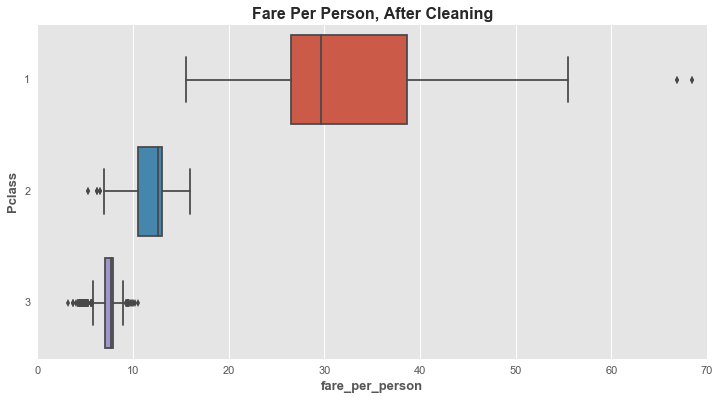

In [54]:
ax = sns.boxplot(x=df.fare_per_person, y=df.Pclass, orient='h')
_ = (ax.set_title('Fare Per Person, After Cleaning'),
     ax.set_xlim(0, 70)
    )

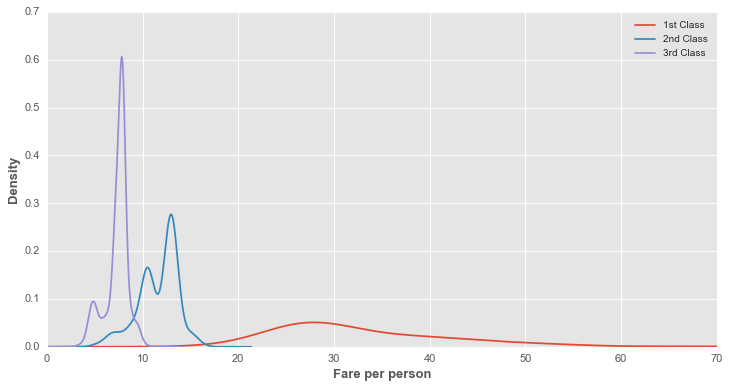

In [55]:
for cl in [1, 2, 3]:
    ax = df.loc[df.Pclass == cl, 'fare_per_person'].plot.kde()
_ = (ax.set_xlim(0, 70), ax.set_xlabel('Fare per person'), 
     plt.legend(('1st Class', '2nd Class', '3rd Class'))
    )

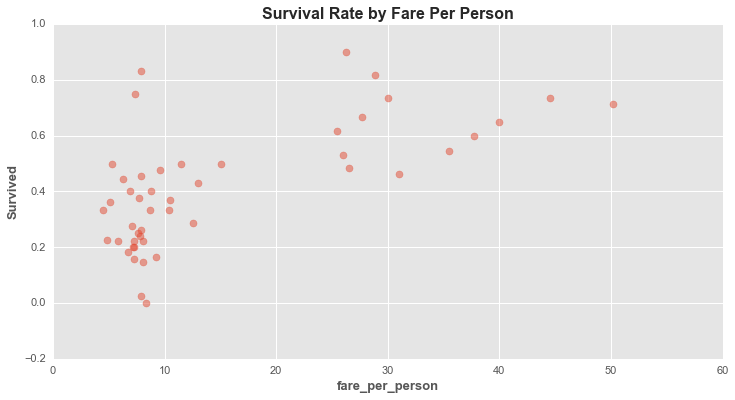

In [56]:
ax = sns.regplot(x='fare_per_person', y='Survived', data=df, x_bins=60, 
                 fit_reg=False, x_ci=None, scatter_kws={'alpha':0.5})

_ = ax.set_title('Survival Rate by Fare Per Person')

In [57]:
print(df.loc[df.Pclass == 1, 'fare_per_person'].describe())
print()
print(df.loc[~(df.Pclass == 1), 'fare_per_person'].describe())

count    323.000000
mean      34.552606
std       14.476464
min       15.500000
25%       26.550000
50%       29.700000
75%       38.643750
max      128.082300
Name: fare_per_person, dtype: float64

count    986.000000
mean       8.540781
std        2.437226
min        3.170800
25%        7.229200
50%        7.883350
75%        9.646875
max       16.000000
Name: fare_per_person, dtype: float64


There's a clear separation in fare between passengers in the first class and the rest of the passengers.

### Deck

Titanic Decks: (listed from top of ship to bottom)

- Boat Deck ("T")
- Promenade Deck ("A")
- Bridge Deck ("B")
- Shelter Deck ("C")
- Saloon Deck ("D")
- Upper Deck ("E")
- Middle Deck ("F")
- Lower Deck ("G")
- Orlop Deck

(Source: http://www.titanicstory.com/shipspec.htm)

First character of a `Cabin` is a name of a deck. There are lots of missing values for cabin, but let's see if we can do anything about it.

In [58]:
df['deck'] = df.Cabin.map(lambda x: x[0] if isinstance(x, str) else x)
df.deck.value_counts(dropna=False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: deck, dtype: int64

We'll impute values based on family members or friends which have known deck.

In [59]:
def deck_filler(person, column):
    # get mode value of a deck for a given column
    return df.loc[df[column]==person[column], 'deck'].value_counts().index[0]


families_w_known_decks = df.loc[(df.deck.notnull()) & (df.family > 0), 
                                ['last_name', 'deck']]

# people whose family has known deck
missing_deck_known = df.deck.isnull() & (df.family > 0) & df.last_name.isin(families_w_known_decks.last_name)

# people who have the same ticket as people whose deck is known
missing_ticket_known = (df.deck.isnull() & df.Ticket.isin(df.loc[df.deck.notnull(), 'Ticket']))


df.loc[missing_deck_known, 'deck'] = df.loc[missing_deck_known].apply(deck_filler, args=('last_name',), axis=1)
df.loc[missing_ticket_known, 'deck'] = df.loc[missing_ticket_known].apply(deck_filler, args=('Ticket',), axis=1)


df.deck.value_counts(dropna=False)

NaN    989
C      104
B       70
D       50
E       42
F       26
A       22
G        5
T        1
Name: deck, dtype: int64

Only one passenger in the top-most deck (T), so we'll put him in the next-highest: 'A'.

In [60]:
df.loc[df.deck == 'T', 'deck'] = 'A'

In [61]:
df.deck.fillna('u', inplace=True)

In [62]:
pd.crosstab(df.deck, df.Pclass, margins=True)

Pclass,1,2,3,All
deck,,,,
A,23,0,0,23
B,68,2,0,70
C,104,0,0,104
D,42,8,0,50
E,34,5,3,42
F,0,16,10,26
G,0,0,5,5
u,52,246,691,989
All,323,277,709,1309


We know decks of 271 first-class passengers (out of 323 total first-class passengers). Situation gets much worse in the lower classes.  

## Final touches

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 22 columns):
Age                1046 non-null float64
Cabin              295 non-null object
Embarked           1309 non-null object
Fare               1309 non-null float64
Name               1309 non-null object
Parch              1309 non-null int64
Pclass             1309 non-null int64
Sex                1309 non-null object
SibSp              1309 non-null int64
Survived           891 non-null float64
Ticket             1309 non-null object
source             1309 non-null object
male               1309 non-null int32
last_name          1309 non-null object
title              1309 non-null object
new_age            1309 non-null float64
family             1309 non-null int64
known_people       1309 non-null int64
mother             1309 non-null int32
family_survived    1309 non-null int64
fare_per_person    1309 non-null float64
deck               1309 non-null object
dtypes: float64(5)

We'll drop columns that are not needed, and encode categorical variables.

In [64]:
not_needed = ['Age', 'Cabin', 'Fare', 
              'Name', 'Sex', 'Ticket', 
              'family', 'male', 'last_name',  
             ]
df_ = df.drop(not_needed, axis=1)


categorical = ['Embarked', 'title', 'deck']

for column in categorical:
    dummy = pd.get_dummies(df_[column], prefix=column).astype(int)
    df_ = df_.join(dummy)
    df_.drop(column, axis=1, inplace=True)

df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 26 columns):
Parch              1309 non-null int64
Pclass             1309 non-null int64
SibSp              1309 non-null int64
Survived           891 non-null float64
source             1309 non-null object
new_age            1309 non-null float64
known_people       1309 non-null int64
mother             1309 non-null int32
family_survived    1309 non-null int64
fare_per_person    1309 non-null float64
Embarked_C         1309 non-null int32
Embarked_Q         1309 non-null int32
Embarked_S         1309 non-null int32
title_Master       1309 non-null int32
title_Miss         1309 non-null int32
title_Mr           1309 non-null int32
title_Mrs          1309 non-null int32
title_Officer      1309 non-null int32
deck_A             1309 non-null int32
deck_B             1309 non-null int32
deck_C             1309 non-null int32
deck_D             1309 non-null int32
deck_E             1309 non-n

In [65]:
df_train_ = df_[df_.source == 'train'].drop('source', axis=1)
df_test_ = df_[df_.source == 'test'].drop('source', axis=1)

df_train_.to_csv('./datasets/titanic-train-2.csv')
df_test_.to_csv('./datasets/titanic-test-2.csv')

New datasets are ready to be used for machine learning. That will be the next topic in this series of notebooks regarding Titanic dataset.

&nbsp;

&nbsp;


#### Notebook Style

In [1]:
from IPython.core.display import HTML
def css_styling(): 
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()